In [1]:
!pip install DeepPurpose torch torchvision torchaudio


     ---------------------------------------- 0.0/158.5 kB ? eta -:--:--
     -------------------- ------------------ 81.9/158.5 kB 4.5 MB/s eta 0:00:01
     ---------------------------------- --- 143.4/158.5 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 158.5/158.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/204.2 MB 1.7 MB/s eta 0:02:04
   ---------------------------------------- 0.1/204.2 MB 1.7 MB/s eta 0:02:04
   --------------------------

In [3]:
!pip install git+https://github.com/bp-kelley/descriptastorus 

!pip install pandas-flavor

  Cloning https://github.com/bp-kelley/descriptastorus to c:\users\prane\appdata\local\temp\pip-req-build-dhndnvd1
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1083436 sha256=b21321d6116b5f8f8a16ad8441a342272d282495092d3c4f8fce4f93f716ae05
  Stored in directory: C:\Users\prane\AppData\Local\Temp\pip-ephem-wheel-cache-xhmrauah\wheels\b0\91\ea\7e8b56f17611c9bebc7f08065799bd317abd64f066463e2e8a
Successfully built descriptastorus


  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus 'C:\Users\prane\AppData\Local\Temp\pip-req-build-dhndnvd1'


In [25]:
!pip install tensorflow-io

   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/22.9 MB 2.6 MB/s eta 0:00:09
   ---------------------------------------- 0.1/22.9 MB 2.6 MB/s eta 0:00:09
   ---------------------------------------- 0.2/22.9 MB 2.0 MB/s eta 0:00:12
   ---------------------------------------- 0.2/22.9 MB 1.7 MB/s eta 0:00:14
    --------------------------------------- 0.3/22.9 MB 1.9 MB/s eta 0:00:12
    --------------------------------------- 0.4/22.9 MB 2.0 MB/s eta 0:00:12
    --------------------------------------- 0.4/22.9 MB 1.7 MB/s eta 0:00:13
    --------------------------------------- 0.5/22.9 MB 1.8 MB/s eta 0:00:13
   - -------------------------------------- 0.6/22.9 MB 1.8 MB/s eta 0:00:13
   - -------------------------------------- 0.7/22.9 MB 1.8 MB/s eta 0:00:13
   - -------------------------------------- 0.7/22.9 MB 1.7 MB/s eta 0:00:13
   - -------------------------------------- 0.7/22.9 MB 1.6 MB/s eta 0:00:14
   - -

In [1]:
from DeepPurpose import utils, dataset ,encoders 
from DeepPurpose import DTI as models
import numpy as np
import torch


In [2]:
X_drugs, X_targets, y = dataset.load_process_DAVIS(path="./data", binary=False)


Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [3]:
drug_encoding, target_encoding = "CNN", "CNN"

train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                      drug_encoding, target_encoding, 
                                      split_method="random")


Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.4502. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.68627. Total time 0.01833 hours
Training at Epoch 1 iteration 200 with loss 0.64506. Total time 0.04805 hours
Training at Epoch 1 iteration 300 with loss 0.48105. Total time 0.07972 hours
Validation at Epoch 1 with loss:1.76110, MSE: 0.71345 , Pearson Correlation: 0.53129 with p-value: 1.23E-218 , Concordance Index: 0.77953
Training at Epoch 2 iteration 0 with loss 0.59215. Total time 0.095 hours
Training at Epoch 2 iteration 100 with loss 0.43742. Total time 0.11333 hours
Training at Epoch 2 iteration 200 with loss 0.74207. Total time 0.13611 hours
Training at Epoch 2 iteration 300 with loss 0.77412. Total time 0.16472 hours
Validation at Epoch 2 with loss:0.45344, MSE: 0.56124 , Pearson Correlation: 0.56499 with p-value: 3.87E-253 , Concordance Index: 0.78741
Training at Epoch 3 iteration 0 with loss 0.

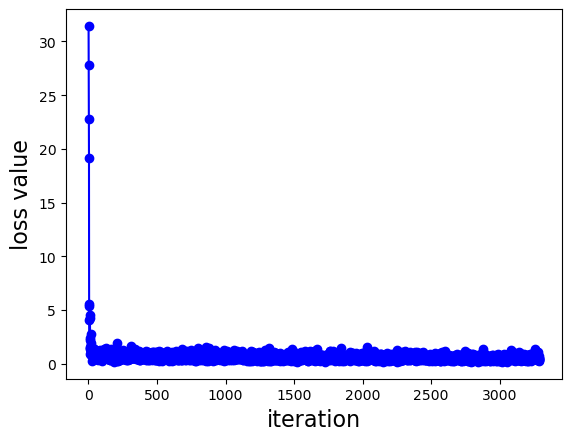

In [4]:
config = utils.generate_config(drug_encoding=drug_encoding, 
                               target_encoding=target_encoding, 
                               train_epoch=10,   # Number of epochs
                               LR=0.001,         # Learning rate
                               batch_size=64, 
                               )

model = models.model_initialize(**config)
model.train(train, val, test)


In [22]:
X_drug = ['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N']
X_target = ['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL']
y = [7.635]
X_pred = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')
y_pred = model.predict(X_pred)
print('The predicted score is ' + str(y_pred))

Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
The predicted score is [5.16188907623291]


In [23]:
model.save_model('./DTI_model')